<a href="https://colab.research.google.com/github/liliyakhabirova/Netology/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2%D0%BE%D0%B4%D1%8B_%D0%B2_%D1%80%D0%B0%D0%B7%D0%BD%D1%8B%D1%85_%D1%80%D0%B5%D0%B3%D0%B8%D0%BE%D0%BD%D0%B0%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
water = pd.read_csv('water.csv')

In [ ]:
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [ ]:
import seaborn as sns

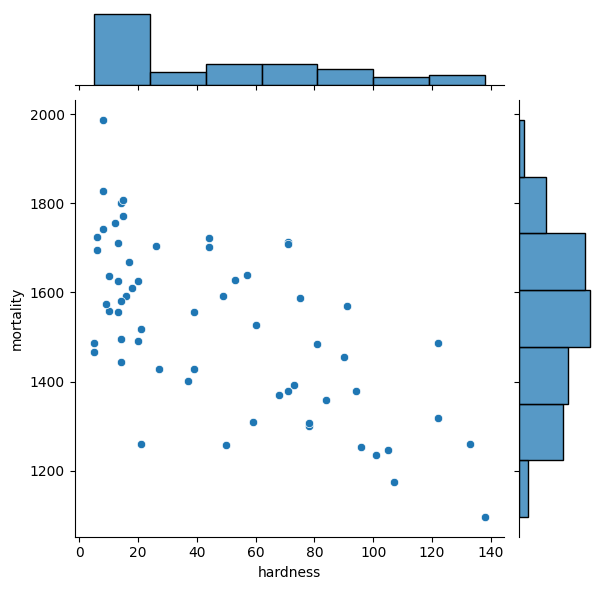

In [ ]:
sns.jointplot(x='hardness', y='mortality', data=water)

In [ ]:
water[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
water[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = water[['hardness']]
y = water['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-3.17385625])

In [ ]:
lm.intercept_

1683.6600457315826

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([1451.96853922, 1417.05612043, 1651.9214832 , 1639.22605818,
       1645.57377069, 1515.44566429, 1667.79076446, 1467.83782048,
       1544.01037057, 1363.10056412, 1528.1410893 , 1664.61690821,
       1436.09925795, 1458.31625172, 1642.39991443, 1642.39991443])

In [ ]:
y_test

10    1392
9     1359
5     1558
43    1444
11    1755
57    1627
2     1466
47    1369
31    1702
41    1236
44    1591
40    1696
7     1299
60    1378
51    1557
42    1711
Name: mortality, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

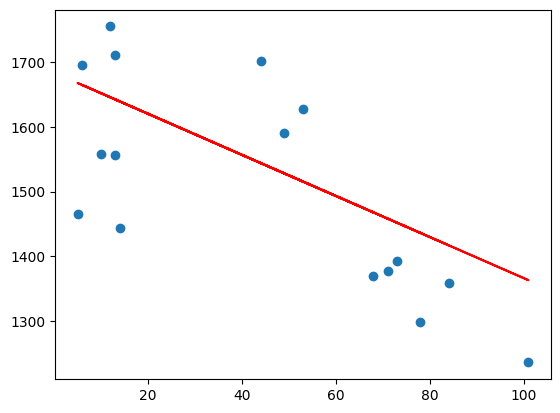

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')

R2: 0.4651134027658942


<Axes: xlabel='mortality', ylabel='Count'>

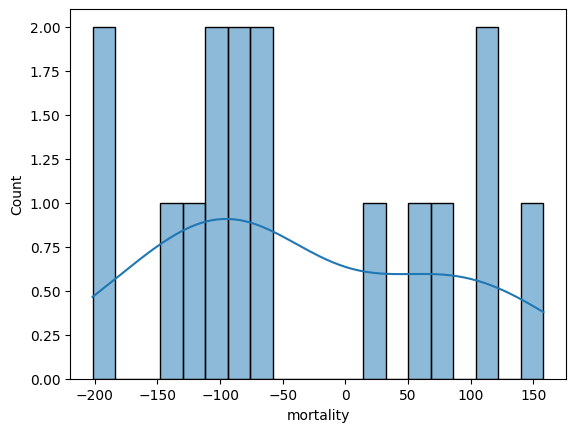

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

Вопрос 1: Прослеживается обратная связь средней силы, коэфициент корреляции -0,63.

In [ ]:
df_north = water[water['location'] == 'North']

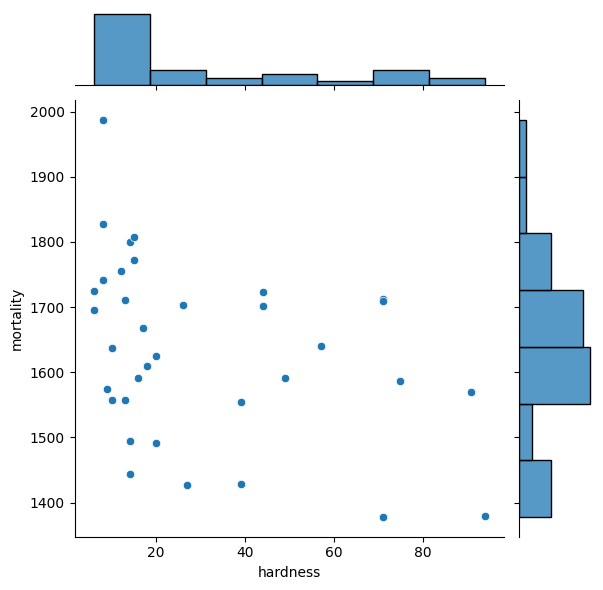

In [ ]:
sns.jointplot(x='hardness', y='mortality', data= df_north)

In [ ]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X = df_north[['hardness']]
y = df_north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-2.15683265])

In [ ]:
lm.intercept_

1714.692139254328

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([1630.57566597, 1552.92969064, 1671.55548629, 1658.6144904 ,
       1682.33964953, 1671.55548629, 1609.00733949, 1686.65331483,
       1693.12381277])

In [ ]:
y_test

17    1428
49    1587
55    1625
30    1704
28    1772
15    1491
44    1591
51    1557
5     1558
Name: mortality, dtype: int64

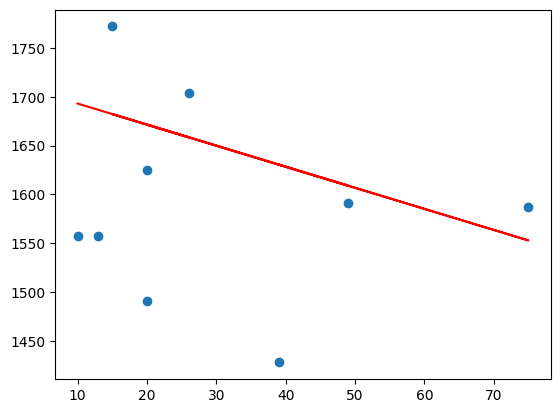

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
print(f'R2: {metrics.r2_score(y_test, y_pred)}')

R2: -0.4320434253153367


<Axes: xlabel='mortality', ylabel='Count'>

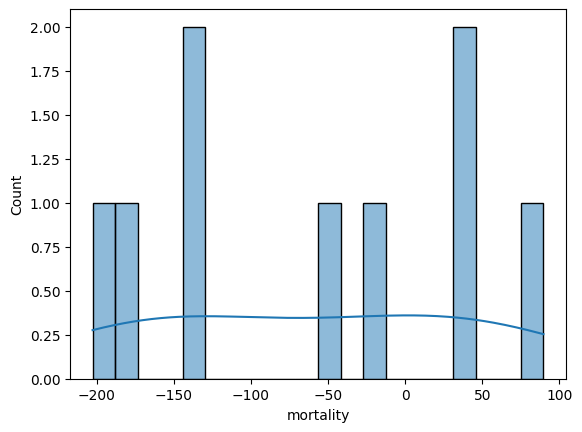

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20)

Вопрос 2: Связь в северном регионе слабая прямая, коэфициент корреляции -0.36

In [ ]:
df_south = water[water['location'] == 'South']

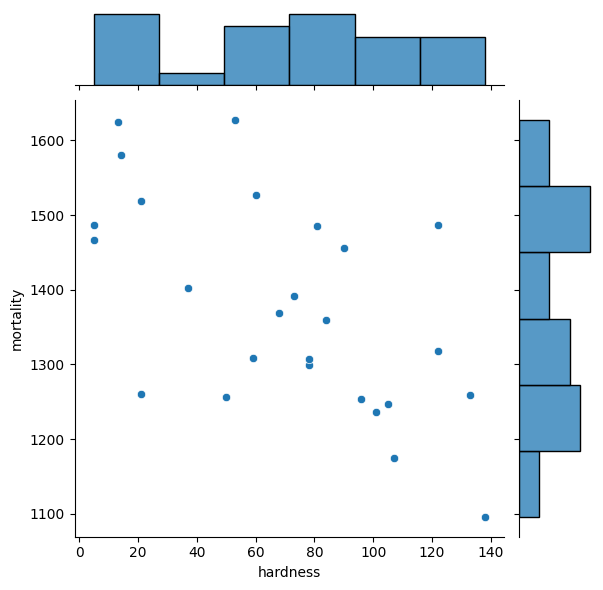

In [ ]:
sns.jointplot(x='hardness', y='mortality', data=df_south)

In [ ]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
X = df_south[['hardness']]
y = df_south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-3.12141428])

In [ ]:
lm.intercept_

1604.266282879566

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([1223.45374102, 1588.65921149, 1276.51778374, 1223.45374102,
       1488.77395461, 1538.71658305, 1420.10284051])

In [ ]:
y_test

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
Name: mortality, dtype: int64

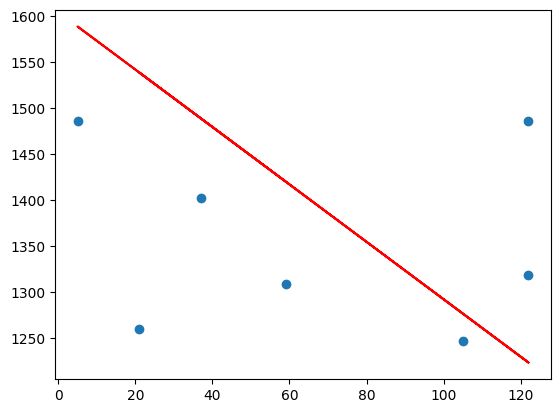

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
metrics.r2_score(y_test, y_pred)

-2.0816097873391897

<Axes: xlabel='mortality', ylabel='Count'>

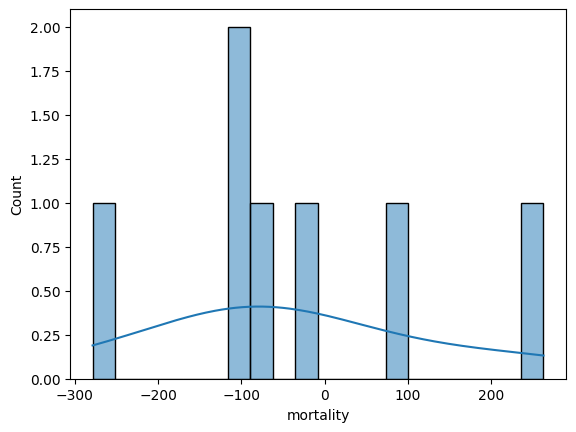

In [ ]:
sns.histplot(y_test-y_pred, kde=True, bins=20)

Вопрос 2: В южном регионе связь прослеживается сильнее чем в северном, коэфициент корреляции -0,59